In [2]:
import numpy as np
from numpy.random import binomial
from scipy.stats import binom
from math import factorial
import matplotlib.pyplot as plt

## Secuencias de eventos tipo Bernoulli

$$
P(k, n; p) = {n \choose k} p^k (1-p)^{n-k} = \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k}
$$

- k: es el número de éxitos.
- n: el número de lanzamientos.
- p: probabilidad de éxito.

In [3]:
def my_binomial(k, n, p):
    return factorial(n)/(factorial(k)*factorial(n-k))*pow(p,k)*pow(1-p, n-k)

In [4]:
my_binomial(2, 3, 0.5)

0.375

In [5]:
dist = binom(3, 0.5)
dist.pmf(2)

0.3750000000000001

## Validación del ejercicio hecho a mano

$$
P(k\leq 2, n=3, p=1/2) = \sum_{k=0}^2 \left[ \frac{n!}{k!(n-k)!}p^k (1-p)^{n-k} \right] = \frac{7}{8}
$$


In [6]:
#cumulative density function (cdf)
dist.cdf(2)

0.875

## Simulaciones de secuencias con generadores aleatorios

* Los generadores aleatorios tienen como propósito simular muestras de datos que resultarían de muestreos en la vida real de procesos aleatorios como lanzar una moneda o un dado.

In [19]:
# simulación con 100 lanzamientos de moneda equilibrada
# (ejecuta esta celda varias veces para observar la variación en los resultados)
p=0.5
n=3
binomial(n,p)

0

In [20]:
arr = []
for _ in range(100):
    arr.append(binomial(n,p))

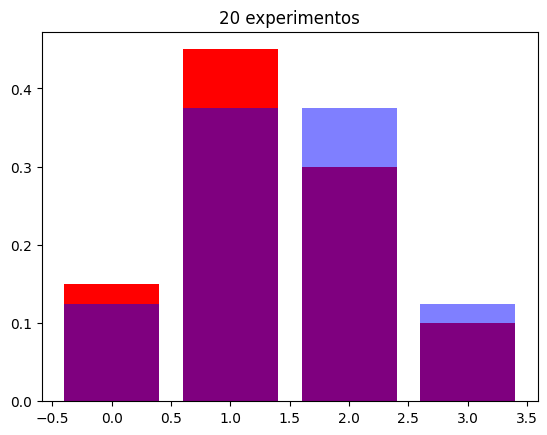

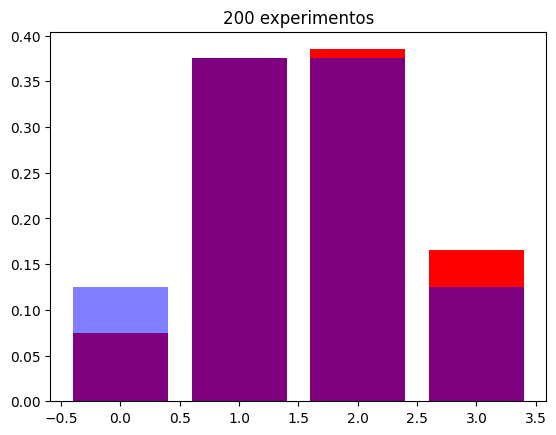

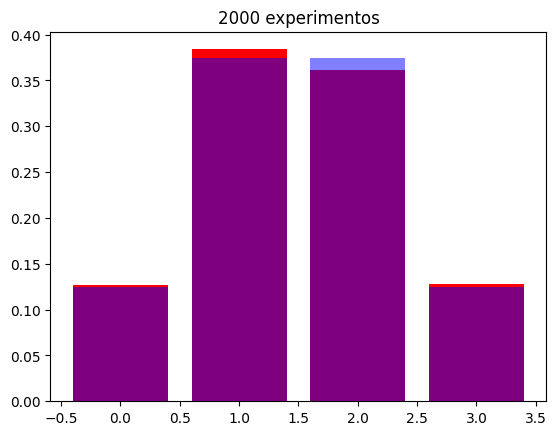

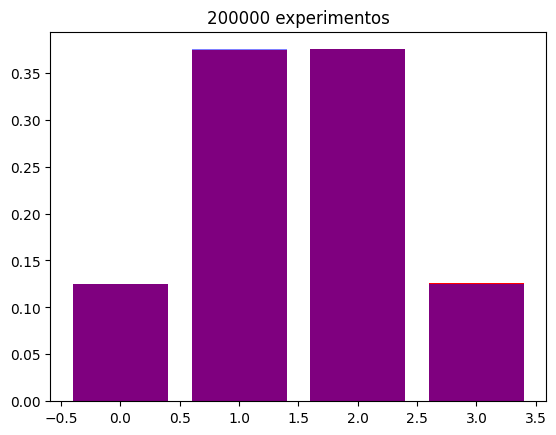

In [27]:
def plot_hist(num_trials):
    values = [0, 1, 2, 3]
    arr = []
    for _ in range(num_trials):
        arr.append(binomial(n, p))
    sim = np.unique(arr, return_counts=True)[1]/len(arr)
    teorica = [binom(3, 0.5).pmf(k) for k in values]

    plt.bar(values, sim, color="red")
    plt.bar(values, teorica, alpha=0.5, color="blue")
    plt.title('{} experimentos'.format(num_trials))
    plt.show()

plot_hist(20)
plot_hist(200)
plot_hist(2000)
plot_hist(200000)

In [21]:
np.unique(arr, return_counts=True)[1]/len(arr)

array([0.15, 0.38, 0.37, 0.1 ])